<a href="https://colab.research.google.com/github/AfifNurraihan/Data_Sains_Kelas_Mahir/blob/main/%5BTUGAS_KASIH_SAYANG_1%5D_Afif%20Nurraihan_1800015022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://lh3.googleusercontent.com/-1Xzmk_Q6pUY/YMOG4DwnGbI/AAAAAAAABAQ/QwEVa4dSGnsDEqUA6dYII_iBWzu94nC4ACLcBGAsYHQ/s16000/header_NNTF.png)

# Pendahuluan

![alt text](https://lh3.googleusercontent.com/-c6UrBR8qr-4/YMXyc34i3II/AAAAAAAABAk/kfrehBBrwVEWLMeR9GO1ZN0-XJPdGt3PQCLcBGAsYHQ/download%2B%25288%2529.png)

Dataset ini merupakan data yang berisikan angka dari 0-9. Dalam kasus ini kita akan mengklasifikasikan dari data gambar yang ada menjadi 10 kelas yaitu kelas { 'nol', 'satu', ..., 'sembilan' }. Memiliki 60000 data latih dan 10000 data uji. Saya akan mencoba membuat Model Machine Learning untuk dataset ini. Harapanya model yang dibuat bisa mengenali angka dan diklasifikasikan ke kelas tertentu sehingga jika ada gambar lain bisa dikenali dengan baik oleh model yang telah di buat.

# Import Library

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Import Data Set

In [ ]:
mnist = tf.keras.datasets.mnist

(gambar_latih, label_latih), (gambar_uji, label_uji) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Data **MNIST** merupakan data angka yang sudah disediakan oleh tensorflow untuk dijadikan latihan. Cara untuk mengimportkan dataset dari librarry tensorflow seperti sintaks di atas.

# Pengerjaan


In [ ]:
nama_kelas = ['Nol', 'Satu', 'Dua', 'Tiga', 'Empat', 'Lima',
               'Enam', 'Tujuh', 'Delapan', 'Sembilan']

Kita akan memberikan nama pada setiap kelasnya mulai dari kelas *Nol* sampai *Sembilan*

In [ ]:
gambar_latih.shape

(60000, 28, 28)

Data latih berisikan 60000 Baris

In [ ]:
len(label_latih)

60000

In [ ]:
gambar_uji.shape

(10000, 28, 28)

In [ ]:
len(label_uji)

10000

Data Test, memiliki 10000 data

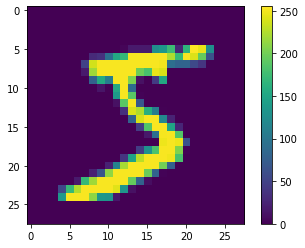

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(gambar_latih[0])
plt.colorbar()
plt.grid(False)
plt.show()

Karena data training memiliki 60000 data maka kita akan mengambil salah satu data yaitu data ke 0. Ternyata gambar yang muncul adalah angka 5 seperti gambar di atas

In [ ]:
gambar_latih = gambar_latih / 255.0

gambar_uji = gambar_uji / 255.0

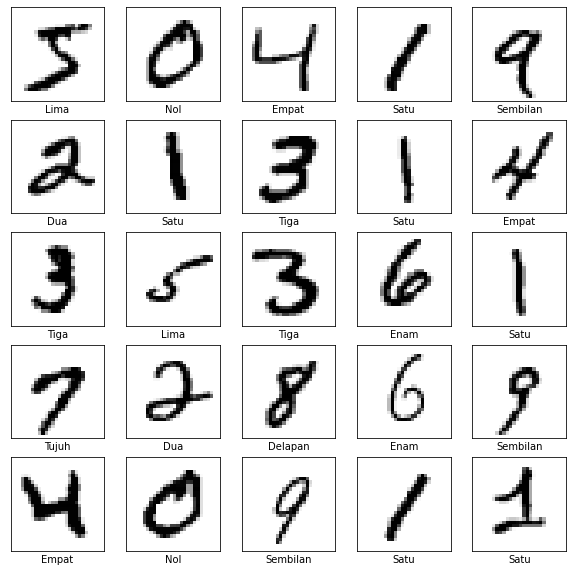

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(gambar_latih[i], cmap=plt.cm.binary)
    plt.xlabel(nama_kelas[label_latih[i]])
plt.show()

Menampilkan 25 data pertama dan diperoleh seperti gambar diatas

# Proses Membuat Model

## Training

In [ ]:
# Membangun Model 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),                   # layer Input
    tf.keras.layers.Dense(128, activation='relu'),                   # Hiden Layer Pertama
    tf.keras.layers.Dense(10)                                        # Layer Output
])

Layer input diberikan dengan ukuran gambar 28 px x 28 px, selanjutnya di eksekusi oleh hiden layer dengan 128 Neuron dengan fungsi aktivasi Relu. Dan terakhir layer output dengan 10 output.

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Fungsi Loss
              
              optimizer='adam',                                                      # Fungsi Optimasi
              
              metrics=['accuracy'])                                                  # Metrik akurasi

Menambahkan fungsi optimisasi **adam** den metrik **akurasi**

In [ ]:
model.fit(gambar_latih,                         # Data latih
          label_latih,                          # Label latih
          epochs=10)                            # Epoch(iterasi)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2580 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1147 - accuracy: 0.9653
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0785 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0592 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0356 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0286 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0223 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0190 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

Melakukan pelatihan dengan 10 kali iterasi. diperoleh akurasi dari pelatihan dan loss. seperti data yang di atas.

In [ ]:
test_loss, test_acc = model.evaluate(gambar_uji,  label_uji, verbose=2)

print('\nTingkat Akurasi Pengujian:', test_acc)

313/313 - 0s - loss: 0.0850 - accuracy: 0.9772

Tingkat Akurasi Pengujian: 0.9771999716758728


Setelah melakukan validasi tingkat akurasi yang diperoleh adalah 97.7%.

## Testing

Kita akan melakukan test pada model machine learning yang telah di buat.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
prediksi = probability_model.predict(gambar_uji)

**Karena** kita akan melihat apakah prediksi yang dibuat berhasil setelah membuat model machine learningnya. Untuk melakukan proof kita akan mengambil salah satu data pada data uji yaitu data indeks ke-3

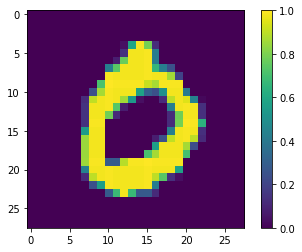

In [ ]:
plt.figure()
plt.imshow(gambar_uji[3])
plt.colorbar()
plt.grid(False)
plt.show()

**Data indeks ke 3** dari Data Test menunjukan seperti gambar angka 0 atau bisa 6

In [ ]:
prediksi[3]

array([9.9988449e-01, 5.4785527e-11, 9.5721643e-06, 6.6375039e-10,
       3.8308121e-09, 1.0458743e-13, 1.0494580e-04, 8.9548394e-07,
       5.8779560e-14, 5.8411377e-08], dtype=float32)

Ini merupakan array probabilitas dari gambar indeks ke 3 ke kelas-kelas yang ada. semakin besar angkanya berarti menunjukan kelasnya.

In [ ]:
np.argmax(prediksi[3])

0

In [ ]:
label_uji[3]

0

**Diperoleh** dataa test indeks ke 3 merupakan kelas 0. hasil ini sesuai dengan gambar yang diperoleh di atas.